### Tarea - Pandas, Polars y gráficas

Accede al sitio web proporcionado y descarga los 4 parquets de taxis de NYC para enero de 2025. A partir de la información que se encuentra en los datasets, elabora 2 notebooks (uno con Pandas y otro con Polars) reportando por lo menos lo siguiente en un informe estadístico:
* Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis
* Qué tipo de taxis recorrieron la mayor cantidad de distancia en enero
* Qué tipo de taxi recibe más propinas en promedio
* Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi
* Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de enero
* Un mapa de calor para cada tipo de taxi que reporte los días de enero en los que más se usó su servicio

### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

In [2]:
yellow_taxis_df = pd.read_parquet('./data/yellow_tripdata_2025-01.parquet', engine='pyarrow')
yellow_taxis_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.00,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.10,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.00
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.10,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.00
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.20,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.00
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.80,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-31 23:01:48,2025-01-31 23:16:29,NaN,3.35,NaN,None,79,237,0,15.85,0.0,0.5,0.00,0.0,1.0,20.60,NaN,NaN,0.75
3475222,2,2025-01-31 23:50:29,2025-02-01 00:17:27,NaN,8.73,NaN,None,161,116,0,28.14,0.0,0.5,0.00,0.0,1.0,32.89,NaN,NaN,0.75
3475223,2,2025-01-31 23:26:59,2025-01-31 23:43:01,NaN,2.64,NaN,None,144,246,0,14.91,0.0,0.5,0.00,0.0,1.0,19.66,NaN,NaN,0.75
3475224,2,2025-01-31 23:14:34,2025-01-31 23:34:52,NaN,3.16,NaN,None,142,107,0,17.55,0.0,0.5,0.00,0.0,1.0,22.30,NaN,NaN,0.75


In [3]:
green_taxis_df = pd.read_parquet('./data/green_tripdata_2025-01.parquet', engine='pyarrow')
green_taxis_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48321,2,2025-01-31 19:36:00,2025-01-31 20:05:00,None,NaN,179,132,NaN,13.99,55.61,...,0.5,11.42,0.00,NaN,1.0,68.53,NaN,NaN,NaN,NaN
48322,2,2025-01-31 20:33:00,2025-01-31 20:41:00,None,NaN,166,75,NaN,1.51,13.58,...,0.5,2.26,0.00,NaN,1.0,17.34,NaN,NaN,NaN,NaN
48323,2,2025-01-31 21:09:00,2025-01-31 21:30:00,None,NaN,41,42,NaN,2.90,30.89,...,0.5,0.00,0.00,NaN,1.0,32.39,NaN,NaN,NaN,NaN
48324,2,2025-01-31 22:22:00,2025-01-31 22:25:00,None,NaN,75,43,NaN,0.34,14.78,...,0.5,2.44,0.00,NaN,1.0,18.72,NaN,NaN,NaN,NaN


In [4]:
fhv_df = pd.read_parquet('./data/fhv_tripdata_2025-01.parquet', engine='pyarrow')
fhv_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2025-01-01 00:20:00,2025-01-01 00:57:00,NaN,NaN,NaN,B00009
1,B00013,2025-01-01 00:40:00,2025-01-01 02:21:00,NaN,NaN,NaN,B00888
2,B00112,2025-01-01 00:22:59,2025-01-01 00:45:28,NaN,108.0,NaN,B00112
3,B00112,2025-01-01 00:32:57,2025-01-01 00:33:10,NaN,14.0,NaN,B00112
4,B00112,2025-01-01 00:46:48,2025-01-01 00:49:51,NaN,14.0,NaN,B00112
...,...,...,...,...,...,...,...
1898103,B03614,2025-01-31 23:22:39,2025-01-31 23:34:46,13.0,68.0,NaN,B03404
1898104,B03614,2025-01-31 23:45:36,2025-01-31 23:58:29,246.0,170.0,NaN,B03404
1898105,B03646,2025-01-31 23:01:03,2025-01-31 23:13:33,260.0,260.0,NaN,B03646
1898106,B03646,2025-01-31 23:15:43,2025-01-31 23:35:37,129.0,193.0,NaN,B03646


In [5]:
fhvhv_df = pd.read_parquet('./data/fhvhv_tripdata_2025-01.parquet', engine='pyarrow')
fhvhv_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,2.75,0.0,0.0,15.71,N,N,N,N,N,0.0
1,HV0005,B03406,None,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,0.00,0.0,0.0,23.57,N,N,N,N,N,0.0
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,0.00,2.5,0.0,47.75,N,N,N,N,N,0.0
3,HV0003,B03404,B03404,2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.820,...,0.00,0.0,0.0,12.20,N,N,N,N,N,0.0
4,HV0003,B03404,B03404,2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.610,...,0.00,0.0,0.0,17.67,N,N,N,N,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405661,HV0003,B03404,B03404,2025-01-31 23:45:39,2025-01-31 23:51:13,2025-01-31 23:51:52,2025-01-31 23:55:59,45,148,0.470,...,2.75,0.0,0.0,17.66,N,N,N,N,N,1.5
20405662,HV0003,B03404,B03404,2025-01-31 23:06:19,2025-01-31 23:08:27,2025-01-31 23:10:28,2025-01-31 23:29:36,235,242,6.360,...,0.00,0.0,0.0,19.80,N,N,N,N,N,0.0
20405663,HV0003,B03404,B03404,2025-01-31 23:25:48,2025-01-31 23:30:47,2025-01-31 23:31:24,2025-01-31 23:48:23,242,235,5.280,...,0.00,0.0,0.0,17.08,N,N,N,N,N,0.0
20405664,HV0003,B03404,B03404,2025-01-31 23:48:59,2025-01-31 23:55:45,2025-01-31 23:57:06,2025-02-01 00:04:35,235,235,0.830,...,0.00,0.0,1.0,6.79,N,N,N,N,N,0.0


### Informe estadístico

Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [6]:
# Promedio taxis amarillos y verdes
yellow_taxis_mean = yellow_taxis_df["total_amount"].mean()
green_taxis_mean = green_taxis_df["total_amount"].mean()

# Promedio taxis FHVHV
fhvhv_total_amount = (
    fhvhv_df["base_passenger_fare"]
    + fhvhv_df["tolls"]
    + fhvhv_df["bcf"]
    + fhvhv_df["sales_tax"]
    + fhvhv_df["congestion_surcharge"]
    + fhvhv_df["airport_fee"]
    + fhvhv_df["cbd_congestion_fee"]
)
fhvhv_mean = fhvhv_total_amount.mean()

# Promedio de todos los taxis
total_sum = (
    yellow_taxis_df["total_amount"].sum()
    + green_taxis_df["total_amount"].sum()
    + fhvhv_total_amount.sum()
)
total_count = (len(yellow_taxis_df) + len(green_taxis_df) + len(fhvhv_df))
overall_mean = total_sum / total_count

# Resultados
print(f"Promedio taxis amarillos: ${yellow_taxis_mean:.2f}")
print(f"Promedio taxis verdes: ${green_taxis_mean:.2f}")
print(f"Promedio taxis FHVHV: ${fhvhv_mean:.2f}")
print(f"Promedio de todos los taxis: ${overall_mean:.2f}")

Promedio taxis amarillos: $25.61
Promedio taxis verdes: $22.63
Promedio taxis FHVHV: $29.66
Promedio de todos los taxis: $29.06


Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [7]:
# Calcular distancias totales
green_taxis_df = green_taxis_df[green_taxis_df["trip_distance"] < 1000]
yellow_taxis_df = yellow_taxis_df[yellow_taxis_df["trip_distance"] < 1000]
fhvhv_df = fhvhv_df[fhvhv_df["trip_miles"] < 1000]

yellow_total_distance = yellow_taxis_df["trip_distance"].sum()
green_total_distance = green_taxis_df["trip_distance"].sum()
fhvhv_total_distance = fhvhv_df["trip_miles"].sum()
# Resultados
print(f"Distancia total taxis amarillos: {yellow_total_distance:,.2f} millas")
print(f"Distancia total taxis verdes: {green_total_distance:,.2f} millas")
print(f"Distancia total taxis FHVHV: {fhvhv_total_distance:,.2f} millas")
print(f"Distancia total taxis: {sum((yellow_total_distance, green_total_distance, fhvhv_total_distance)):,.2f} millas")

# Calcular el número de viajes
yellow_trip_count = len(yellow_taxis_df)
green_trip_count = len(green_taxis_df)
fhvhv_trip_count = len(fhvhv_df)
# Resultados
print(f"\nTotal de viajes taxis amarillos: {yellow_trip_count}")
print(f"Total de viajes taxis verdes: {green_trip_count}")
print(f"Total de viajes taxis FHVHV: {fhvhv_trip_count}")
print(f"Total de viajes taxis: {sum((yellow_trip_count, green_trip_count, fhvhv_trip_count))}")

# Distancia promedio por viaje
yellow_avg_distance = yellow_total_distance / yellow_trip_count
green_avg_distance = green_total_distance / green_trip_count
fhvhv_avg_distance = fhvhv_total_distance / fhvhv_trip_count
# Resultados
print(f"\nDistancia promedio por viaje taxis amarillos: {yellow_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis verdes: {green_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis FHVHV: {fhvhv_avg_distance:,.2f} millas")
print(f"Distancia promedio por viaje taxis: {sum((yellow_avg_distance, green_avg_distance, fhvhv_avg_distance)):,.2f} millas")

Distancia total taxis amarillos: 10,761,278.29 millas
Distancia total taxis verdes: 122,983.48 millas
Distancia total taxis FHVHV: 98,978,656.51 millas
Distancia total taxis: 109,862,918.28 millas

Total de viajes taxis amarillos: 3475110
Total de viajes taxis verdes: 48305
Total de viajes taxis FHVHV: 20405666
Total de viajes taxis: 23929081

Distancia promedio por viaje taxis amarillos: 3.10 millas
Distancia promedio por viaje taxis verdes: 2.55 millas
Distancia promedio por viaje taxis FHVHV: 4.85 millas
Distancia promedio por viaje taxis: 10.49 millas


Los taxis FHVHV recorrieron la mayor cantidad de distancia en enero, con un total de $98,978,656.51$ millas. También fueron los que más distancia recorrieron en promedio, con un total de $4.85$ millas.

¿Qué tipo de taxi recibe más propinas en promedio?

In [8]:
# Propina de taxis amarillos
yellow_avg_tip = yellow_taxis_df["tip_amount"].mean()

# Propina de taxis verdes
green_avg_tip = green_taxis_df["tip_amount"].mean()

# Propina de taxis FHVHV
fhvhv_avg_tip = fhvhv_df["tips"].mean()

# Resultados
print(f"Propina promedio taxis amarillos: ${yellow_avg_tip:.2f}")
print(f"Propina promedio taxis verdes: ${green_avg_tip:.2f}")
print(f"Propina promedio taxis FHVHV: ${fhvhv_avg_tip:.2f}")
# Propina promedio de todos los taxis
total_tip_sum = (
    yellow_taxis_df["tip_amount"].sum()
    + green_taxis_df["tip_amount"].sum()
    + fhvhv_df["tips"].sum()
)
total_tip_count = (len(yellow_taxis_df) + len(green_taxis_df) + len(fhvhv_df))
overall_tip_mean = total_tip_sum / total_tip_count
# Resultados
print(f"Propina promedio de todos los taxis: ${overall_tip_mean:.2f}")

Propina promedio taxis amarillos: $2.96
Propina promedio taxis verdes: $2.48
Propina promedio taxis FHVHV: $1.04
Propina promedio de todos los taxis: $1.32


Los taxis amarillos reciben la mayor cantidad de propinas en promedio, con un total de $ $2.96$ por viaje.

Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi.

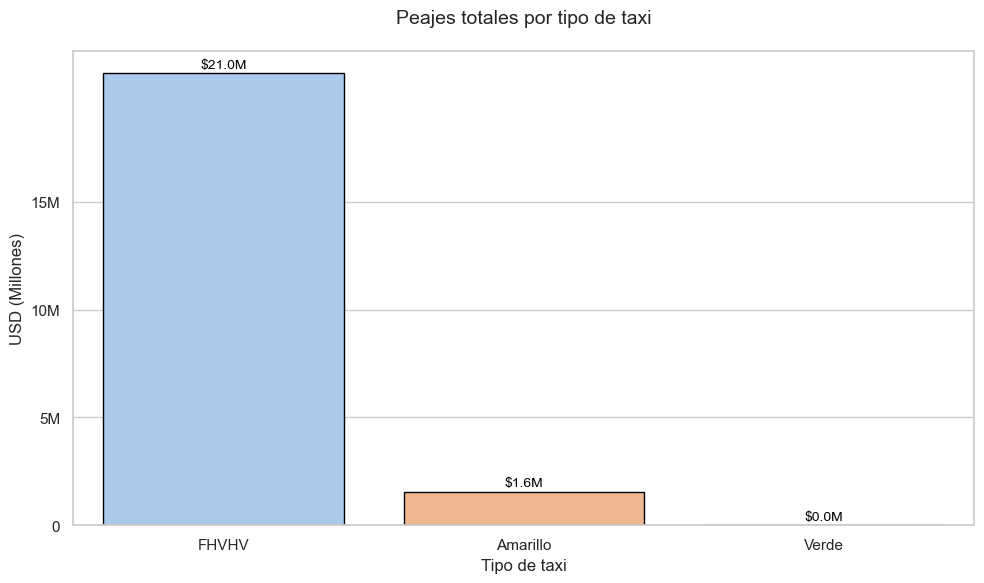

In [9]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

toll_data = {
    'Tipo de Taxi': ['Amarillo', 'Verde', 'FHVHV'],
    'Total de Peajes': [
        yellow_taxis_df['tolls_amount'].sum(),
        green_taxis_df['tolls_amount'].sum(),
        fhvhv_df['tolls'].sum()
    ]
}

df_tolls = pd.DataFrame(toll_data)
df_tolls = df_tolls.sort_values('Total de Peajes', ascending=False)

barplot = sns.barplot(
    x='Tipo de Taxi',
    y='Total de Peajes',
    data=df_tolls,
    hue='Tipo de Taxi',
    dodge=False,
    palette="pastel",
    edgecolor='black'
)

plt.title('Peajes totales por tipo de taxi', fontsize=14, pad=20)
plt.xlabel('Tipo de taxi', fontsize=12)
plt.ylabel('USD (Millones)', fontsize=12)
plt.yticks([0, 5e6, 1e7, 1.5e7], ['0', '5M', '10M', '15M'])

# Anotaciones
for i, value in enumerate(df_tolls['Total de Peajes']):
    barplot.annotate(
        f'${value/1e6:.1f}M',
        (i, value + 0.1e6),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

In [10]:
taxis = {
    'Yellow Taxis': (yellow_taxis_df, 'tpep_pickup_datetime'),
    'Green Taxis': (green_taxis_df, 'lpep_pickup_datetime'),
    'FHV': (fhv_df, 'pickup_datetime'),
    'FHVHV': (fhvhv_df, 'pickup_datetime')
}

all_pickups = pd.concat([
    yellow_taxis_df['tpep_pickup_datetime'].rename('pickup_datetime'),
    green_taxis_df['lpep_pickup_datetime'].rename('pickup_datetime'),
    fhv_df['pickup_datetime'],
    fhvhv_df['pickup_datetime']
])

heatmap_data = all_pickups.to_frame().assign(
    hour=all_pickups.dt.hour,
    day=all_pickups.dt.day
)

pivot_table = (
    heatmap_data
    .groupby(['day', 'hour'])
    .size()
    .reset_index(name='counts')
    .pivot(index='day', columns='hour', values='counts')
    .fillna(0)
)

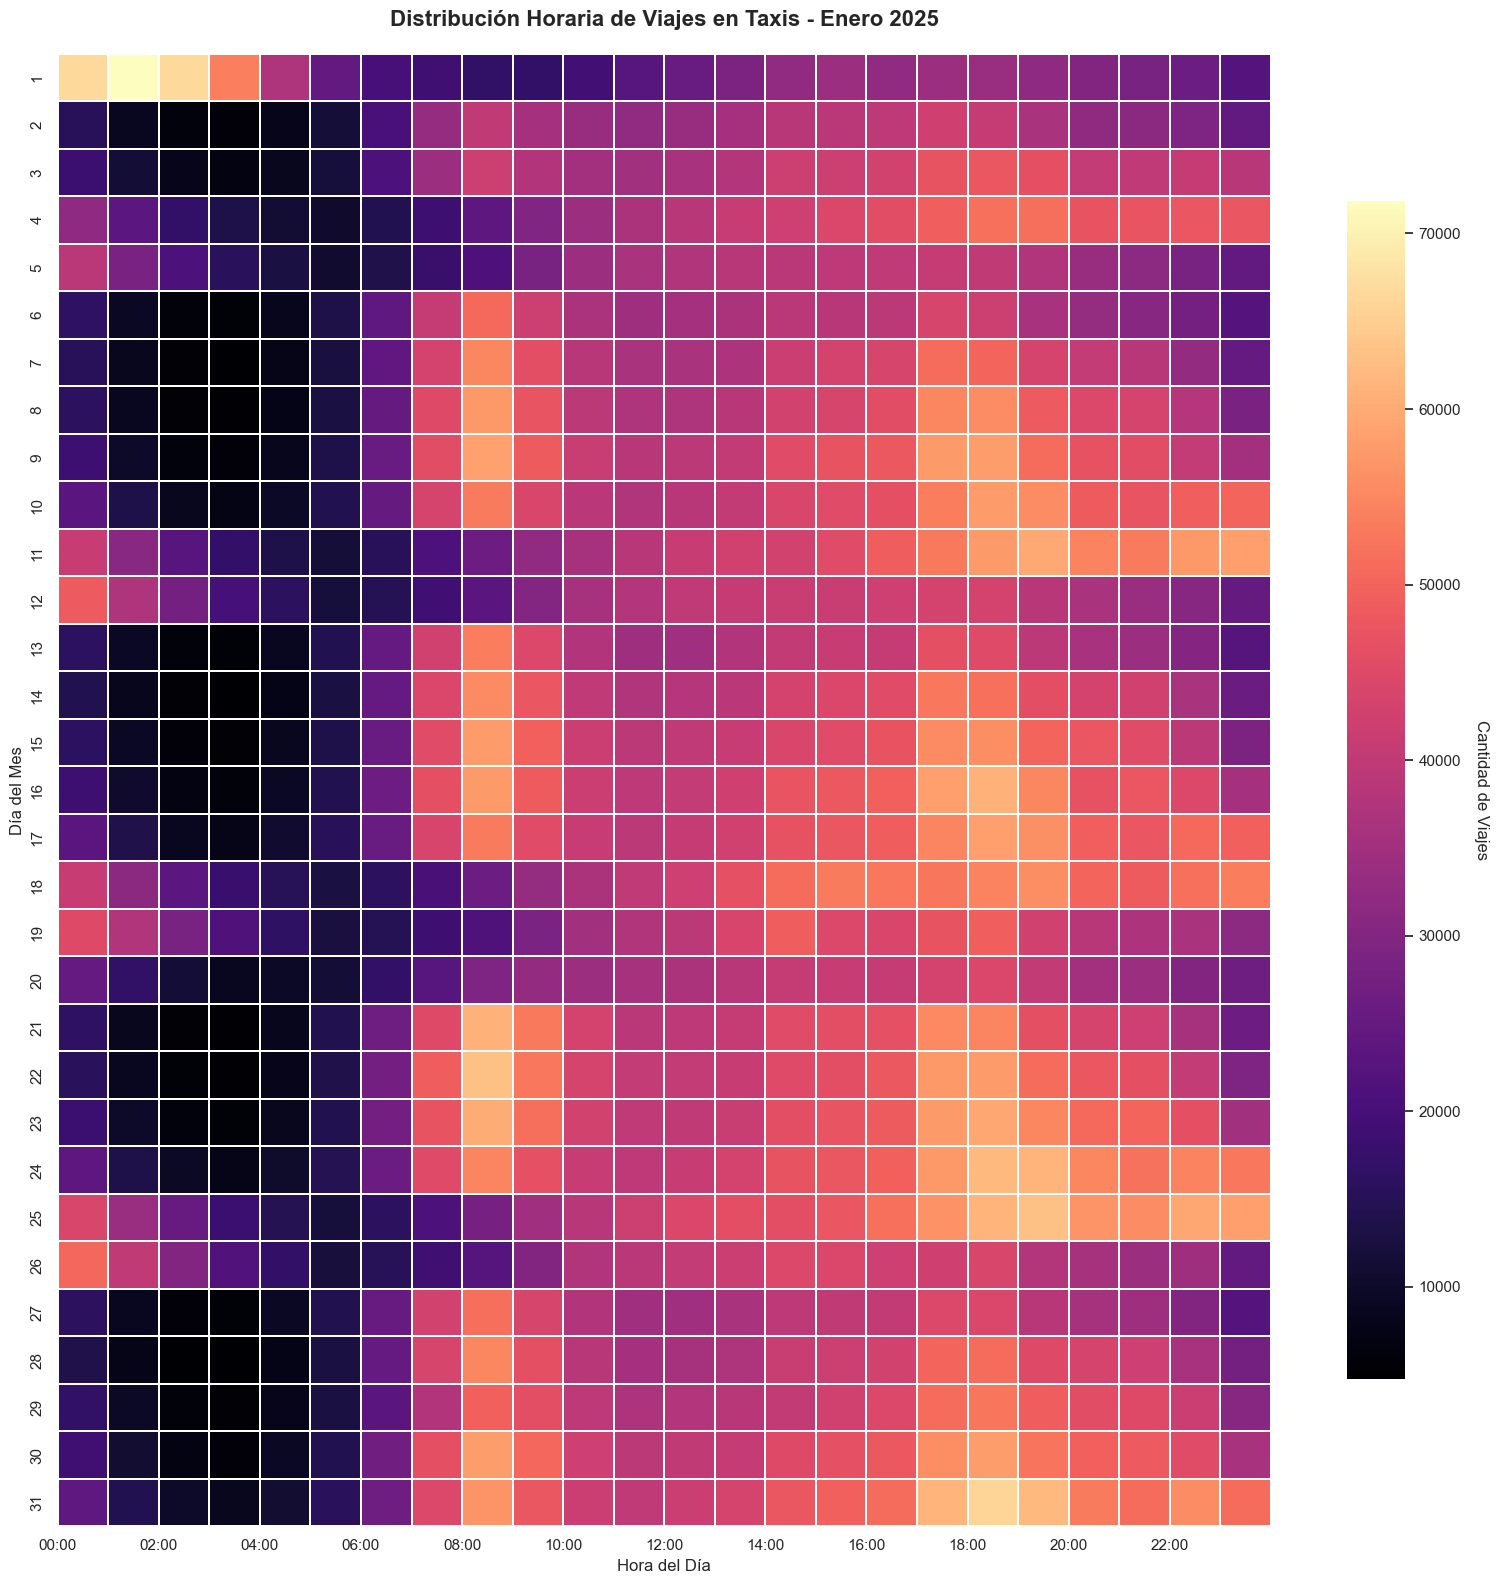

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 16))

ax = sns.heatmap(
    pivot_table,
    cmap='magma',
    linewidths=0.1,
    linecolor='white',
    cbar_kws={'label': 'Cantidad de Viajes', 'shrink': 0.8}
)

plt.title('Distribución Horaria de Viajes en Taxis - Enero 2025', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Día del Mes', fontsize=12)

ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)])

days_in_january = 31
ax.set_yticks([d + 0.5 for d in range(days_in_january)])
ax.set_yticklabels([str(d + 1) for d in range(days_in_january)])

ax.collections[0].colorbar.set_label('Cantidad de Viajes', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

<Figure size 1800x1800 with 0 Axes>

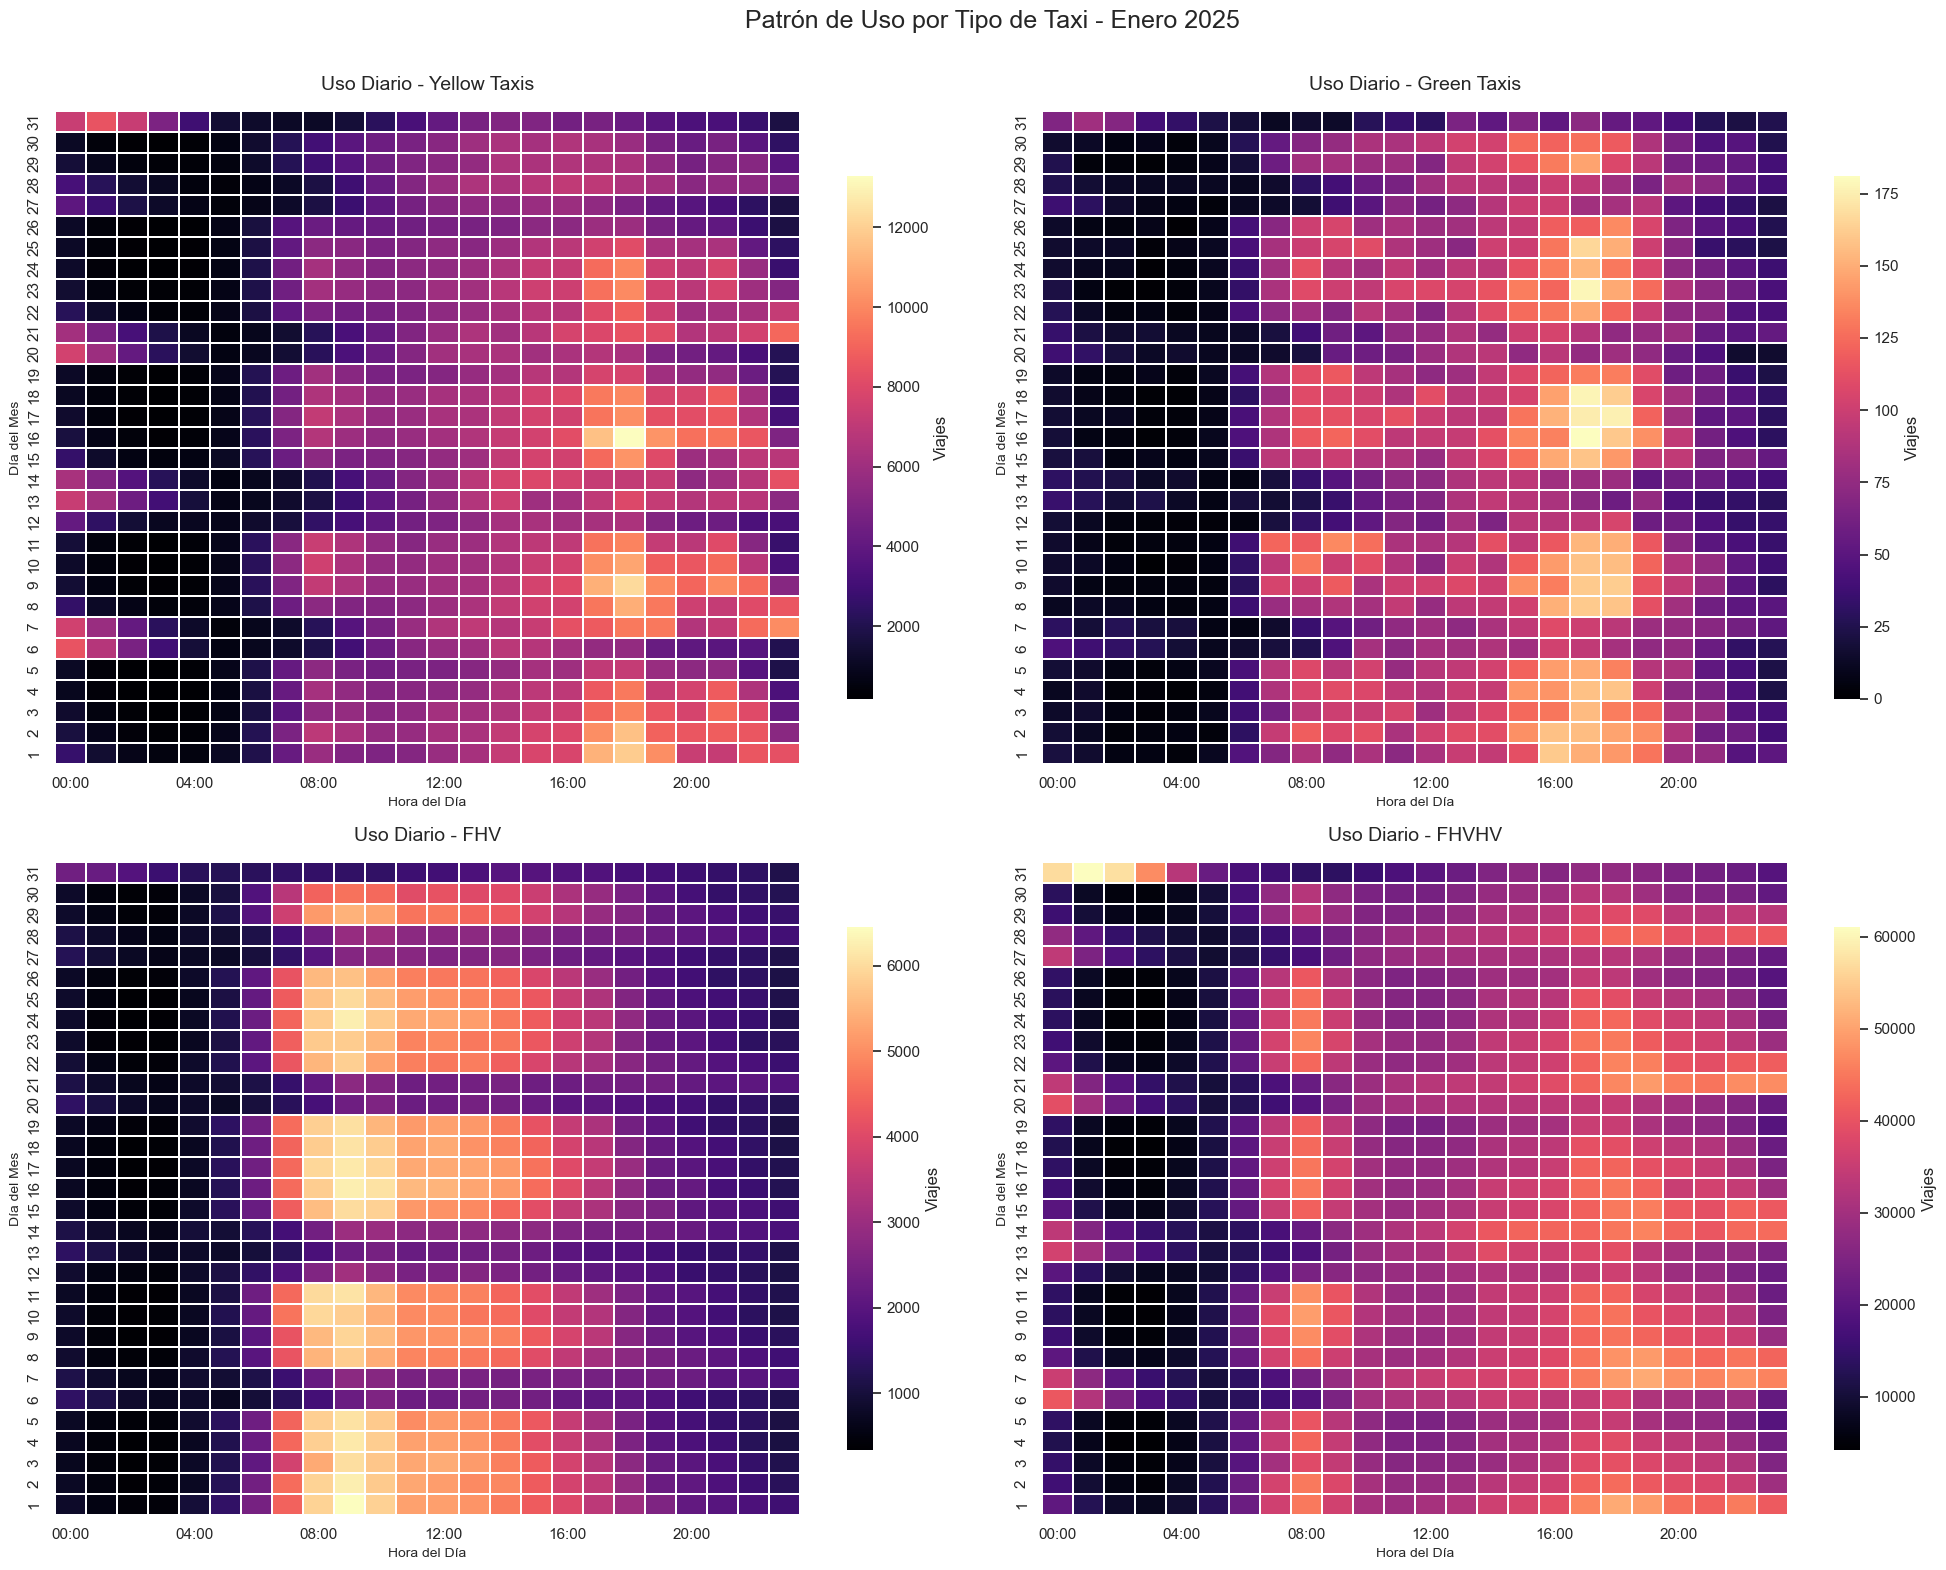

In [12]:
plt.figure(figsize=(18, 18))

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

for (taxi_name, (df, time_col)), ax in zip(taxis.items(), axes.flatten()):
    jan_data = df[df[time_col].dt.month == 1]
    heatmap_data = jan_data.assign(
        day=jan_data[time_col].dt.day,
        hour=jan_data[time_col].dt.hour
    )

    pivot = heatmap_data.groupby(
        ['day', 'hour']).size().reset_index(name='counts')
    pivot_table = pivot.pivot(
        index='day', columns='hour', values='counts').fillna(0)

    sns.heatmap(
        pivot_table,
        ax=ax,
        cmap='magma',
        cbar_kws={'label': 'Viajes', 'shrink': 0.8},
        linewidths=0.3,
        linecolor='white'
    )

    ax.set_title(f'Uso Diario - {taxi_name}', fontsize=14, pad=15)
    ax.set_xlabel('Hora del Día', fontsize=10)
    ax.set_ylabel('Día del Mes', fontsize=10)

    ax.set_xticks([x + 0.5 for x in range(0, 24, 4)])
    ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 4)])

    ax.set_yticks([d + 0.5 for d in range(31)])
    ax.set_yticklabels([f'{d}' for d in pivot_table.index][::-1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Patrón de Uso por Tipo de Taxi - Enero 2025',
             fontsize=18, y=0.98)
plt.show()
